<a href="https://colab.research.google.com/github/inezaurelliaa/Project-Ekonometri/blob/main/Forecasting_IHSG_di_Pasar_Modal_Indonesia_dengan_model_ARIMA_ARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Penerapan Model ARIMA-ARCH Dalam Peramalan Indeks Harga Saham Gabungan (IHSG) di Pasar Modal Indonesia Pada Tahun 2009-2022**

## Kelompok 11 
1.	Annisa Fairuz Zahira		2006571015
2.	Inez Aurellia Rosyana		2006571204
3.	Nadhila Nur Qamarina 	  2006521742


###Install packages

In [3]:
install.packages(c("foreign","ggplot2","grid","gridExtra","kableExtra","knitr",
                  "scales","dynlm","FinTS","fGarch","prettydoc","aTSA","FinTS",
                  "lmtest","TSA","tseries","forecast","quantmod","rugarch","MTS",
                  "Metrics"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”
also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘rbibutils’, ‘misc3d’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘webshot’, ‘zoo’, ‘car’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’, ‘leaps’, ‘locfit’, ‘quadprog’, ‘fracdiff’, ‘Rcpp’, ‘urca’, ‘RcppArmadillo’, ‘xts’, ‘TTR’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘mvtnorm’, ‘RcppEigen’




In [4]:
library(foreign)
library(ggplot2)
library(grid)
library(gridExtra)
library(kableExtra)
library(knitr)
library(scales)
library(dynlm)
library(FinTS)
library(fGarch)
library(prettydoc)
library(aTSA)
library(FinTS)
library(lmtest)
library(TSA)
library(tseries)
library(forecast)
library(quantmod)
library(rugarch)
library(MTS)
library(Metrics)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")


Attaching package: ‘aTSA’


The following object is masked from ‘package:graphics’:

    identify



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘tseries’


The following objects are masked from ‘package:aTSA’:

    adf.test, kpss.test, pp.test


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package: ‘forecast’


The follow

### Input Data

In [5]:
Data <- read.csv('https://raw.githubusercontent.com/inezaurelliaa/Project-Ekonometri/main/IHSG%20BEI%202009-2022.csv',sep=';')
Data$Indeks<- ts(Data$Indeks)
Data$Periode<- seq.Date(as.Date('2009-01-01'), by = 'month', length.out = length(ts(Data$Indeks)))

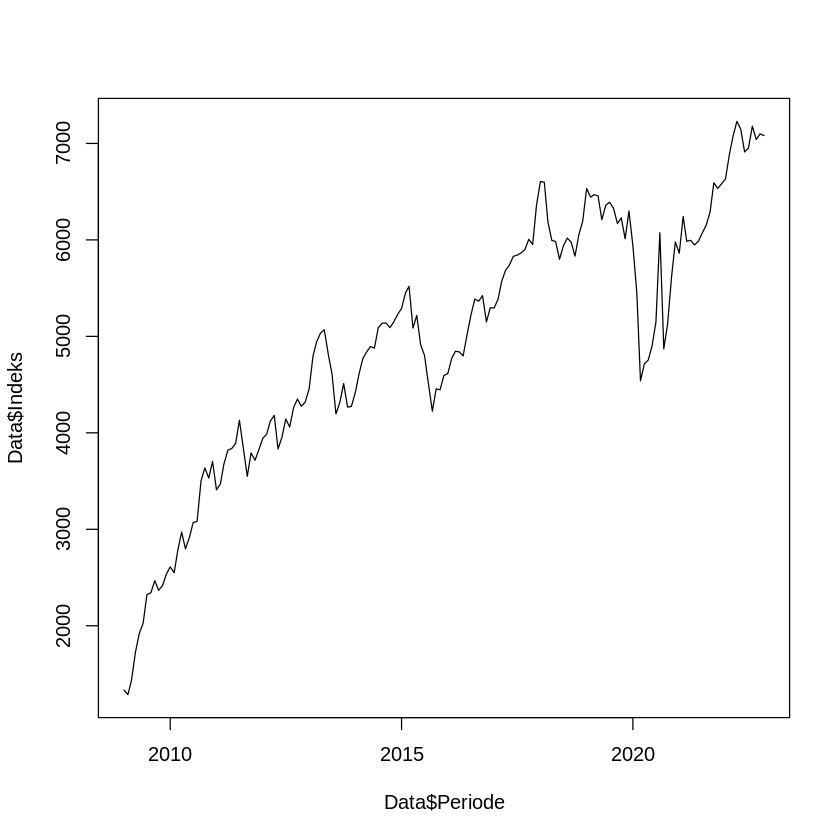

In [6]:
plot(x=Data$Periode,y= Data$Indeks,type='l')

### Uji Stasioneritas 

In [7]:
adf.test(Data$Indeks)


	Augmented Dickey-Fuller Test

data:  Data$Indeks
Dickey-Fuller = -2.9144, Lag order = 5, p-value = 0.1947
alternative hypothesis: stationary


Warning message in adf.test(diff_indeks):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_indeks
Dickey-Fuller = -5.2915, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


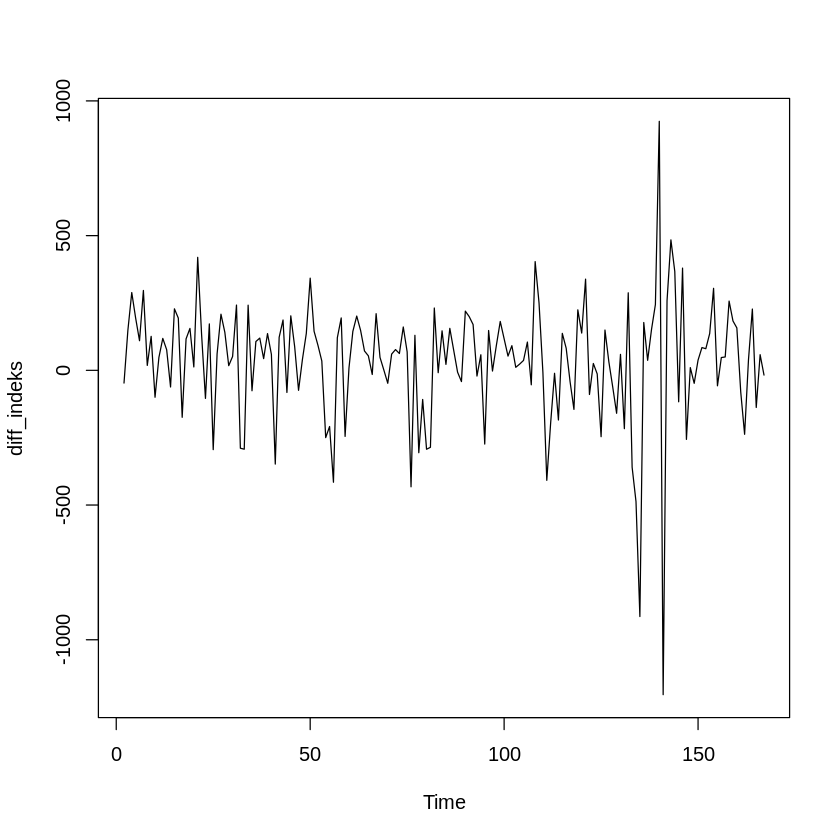

In [8]:
#differencing data
diff_indeks <- diff(Data$Indeks,lag=1)
plot(x=diff_indeks,type='l')
adf.test(diff_indeks)

### Menentukan Model ARIMA terbaik

#### Plot ACF, PACF, EACF

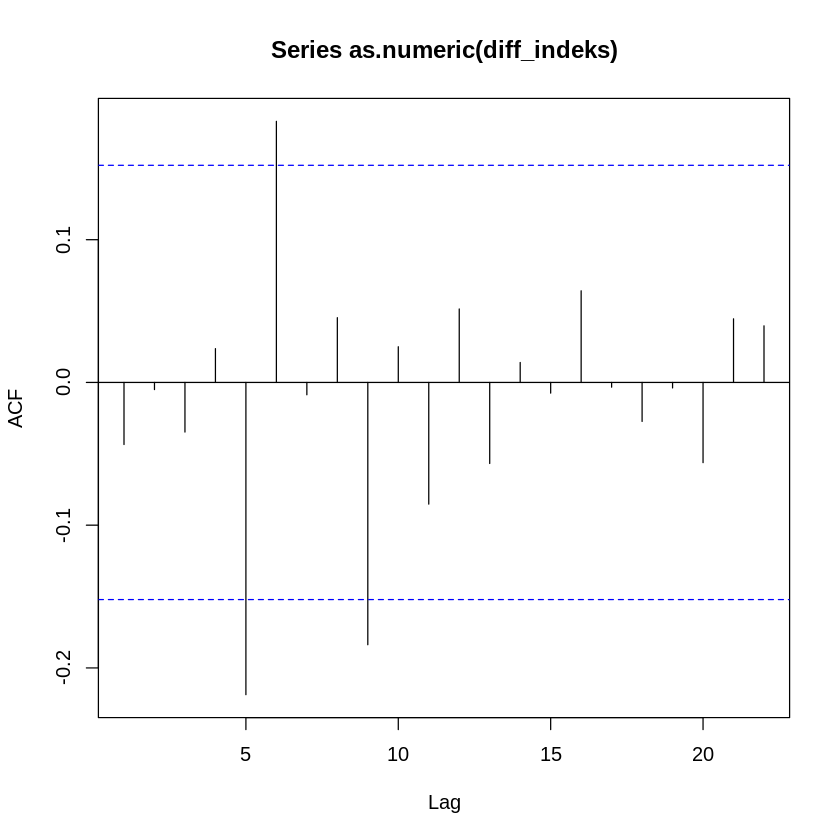

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o x x o o x o o  o  o  o 
1 o o o o o x o o x o o  o  o  o 
2 x x o o o x o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 o o o o o o o o o o o  o  o  o 
5 x x x o x o o o o o o  o  o  o 
6 o x x o o o o o o o o  o  o  o 
7 o o x x o o x o x o o  o  o  o 


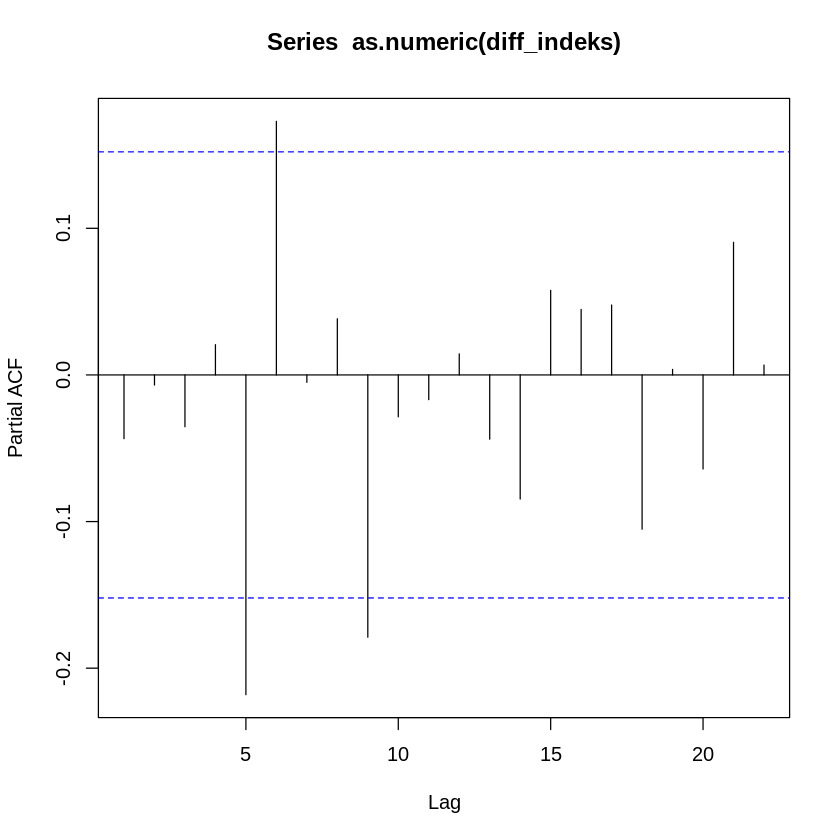

In [9]:
#acf data 
acf(as.numeric(diff_indeks))

#pacf data 
pacf(as.numeric(diff_indeks))

#eacf
eacf(as.numeric(diff_indeks))

####Kandidat Model

In [10]:
#model ARIMA
model1_arima <- Arima(Data$Indeks, order=c(0,1,1))
model2_arima <- Arima(Data$Indeks, order=c(0,1,4))
model3_arima <- Arima(Data$Indeks, order=c(2,1,2))
model4_arima <- Arima(Data$Indeks, order = c(1,1,0))
model5_arima <- Arima(Data$Indeks, order = c(0,1,0))

In [11]:
#summary model ARIMA
summary(model1_arima)
summary(model2_arima)
summary(model3_arima)
summary(model4_arima)
summary(model5_arima)

Series: Data$Indeks 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.0184
s.e.   0.0761

sigma^2 = 52578:  log likelihood = -1137.26
AIC=2278.51   AICc=2278.59   BIC=2284.74

Training set error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 35.0781 227.9225 161.9727 0.8881207 3.595478 0.9937188 -0.02491813

Series: Data$Indeks 
ARIMA(0,1,4) 

Coefficients:
          ma1      ma2      ma3     ma4
      -0.0047  -0.0008  -0.0091  0.0383
s.e.   0.0832   0.0886   0.0698  0.0854

sigma^2 = 53470:  log likelihood = -1137.13
AIC=2284.27   AICc=2284.64   BIC=2299.83

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 33.66599 227.7486 161.8569 0.8539294 3.592226 0.9930083
                    ACF1
Training set -0.02956015

Series: Data$Indeks 
ARIMA(2,1,2) 

Coefficients:
         ar1     ar2      ma1      ma2
      0.0403  0.9594  -0.0845  -0.9111
s.e.  0.0569  0.0569   0.0816   0.0818

sigma^2 = 51258:  log likelihood = -1134.26
AIC=2278.52   AICc=2278.9   BIC=2294.08

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 8.101679 222.9867 153.0186 0.3196175 3.403867 0.9387847 0.03581514

Series: Data$Indeks 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.0190
s.e.   0.0774

sigma^2 = 52578:  log likelihood = -1137.26
AIC=2278.51   AICc=2278.59   BIC=2284.74

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 35.08832 227.9211 161.9668 0.8883778 3.595408 0.9936827
                    ACF1
Training set -0.02426477

Series: Data$Indeks 
ARIMA(0,1,0) 

sigma^2 = 52280:  log likelihood = -1137.29
AIC=2276.57   AICc=2276.6   BIC=2279.69

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 34.43097 227.9629 162.0285 0.8720917 3.594061 0.9940609
                    ACF1
Training set -0.04315108

In [12]:
#uji signifikansi koefisien
coeftest(model1_arima)
coeftest(model2_arima)
coeftest(model3_arima)
coeftest(model4_arima)


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)
ma1 -0.018399   0.076087 -0.2418   0.8089



z test of coefficients:

       Estimate  Std. Error z value Pr(>|z|)
ma1 -0.00467459  0.08322158 -0.0562   0.9552
ma2 -0.00077496  0.08856988 -0.0087   0.9930
ma3 -0.00912356  0.06984738 -0.1306   0.8961
ma4  0.03831490  0.08539070  0.4487   0.6536



z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1  0.040290   0.056864   0.7085   0.4786    
ar2  0.959447   0.056888  16.8655   <2e-16 ***
ma1 -0.084476   0.081599  -1.0353   0.3005    
ma2 -0.911078   0.081764 -11.1428   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)
ar1 -0.019036   0.077381  -0.246   0.8057


### Residual Checking

####Uji Independensi Residual


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 13.55, df = 6, p-value = 0.03508

Model df: 4.   Total lags used: 10



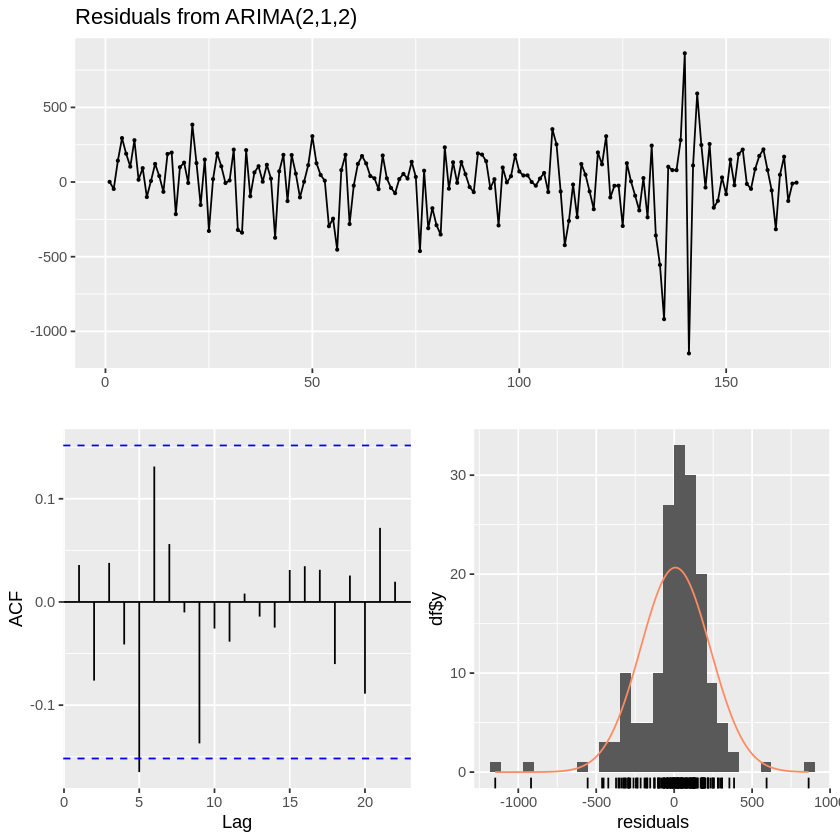

In [13]:
checkresiduals(model3_arima)


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 21.267, df = 10, p-value = 0.0193

Model df: 0.   Total lags used: 10



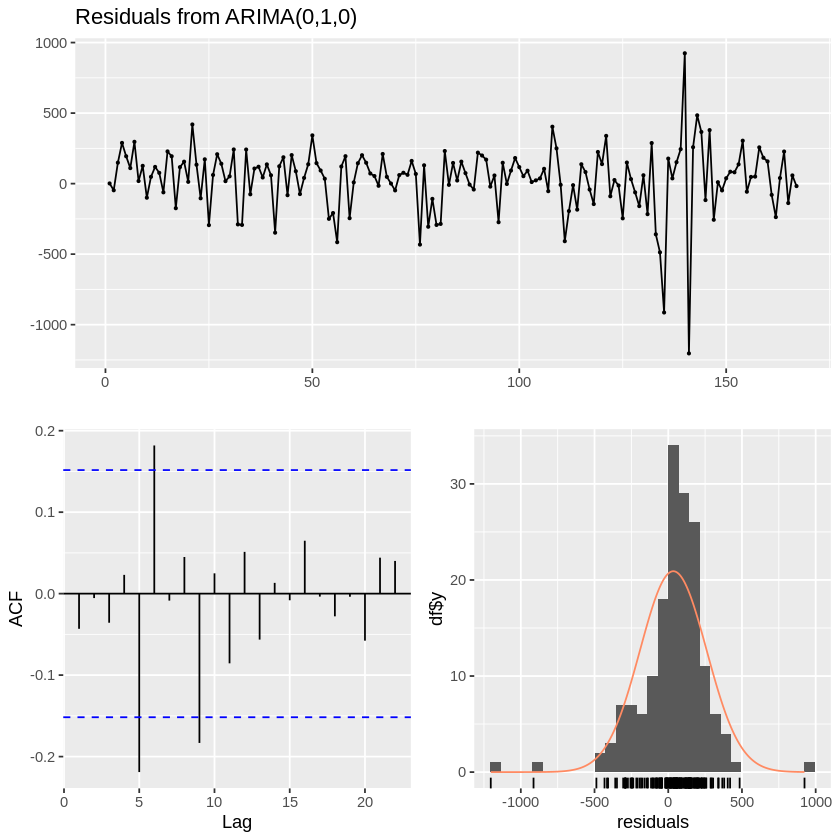

In [14]:
checkresiduals(model5_arima)

####Uji Normalitas Residual

In [15]:
jarque.bera.test(residuals(model3_arima))


	Jarque Bera Test

data:  residuals(model3_arima)
X-squared = 284.74, df = 2, p-value < 2.2e-16


In [16]:
jarque.bera.test(residuals(model5_arima))


	Jarque Bera Test

data:  residuals(model5_arima)
X-squared = 394.23, df = 2, p-value < 2.2e-16


####Uji Arch Effect

In [17]:
#residual dari model arima (0,1,0)
residual1 <- resid(model5_arima)
square_resid1 <- residual1^2
#arch test model arima (0,1,0)
#h0 = tidak ada efek arch
archTest(square_resid1)

Q(m) of squared series(LM test):  
Test statistic:  27.12331  p-value:  0.002489864 
Rank-based Test:  
Test statistic:  8.768009  p-value:  0.5542529 


In [18]:
#residual dari model arima (2,1,2)
residual2 <- resid(model3_arima)
square_resid2 <- residual2^2
#arch test model arima (2,1,2)
#h0 = tidak ada efek arch
archTest(square_resid2)

Q(m) of squared series(LM test):  
Test statistic:  30.74035  p-value:  0.0006475359 
Rank-based Test:  
Test statistic:  7.879336  p-value:  0.640622 


### Specify ARCH Model

####Plot ACF dan PACF dari residual model

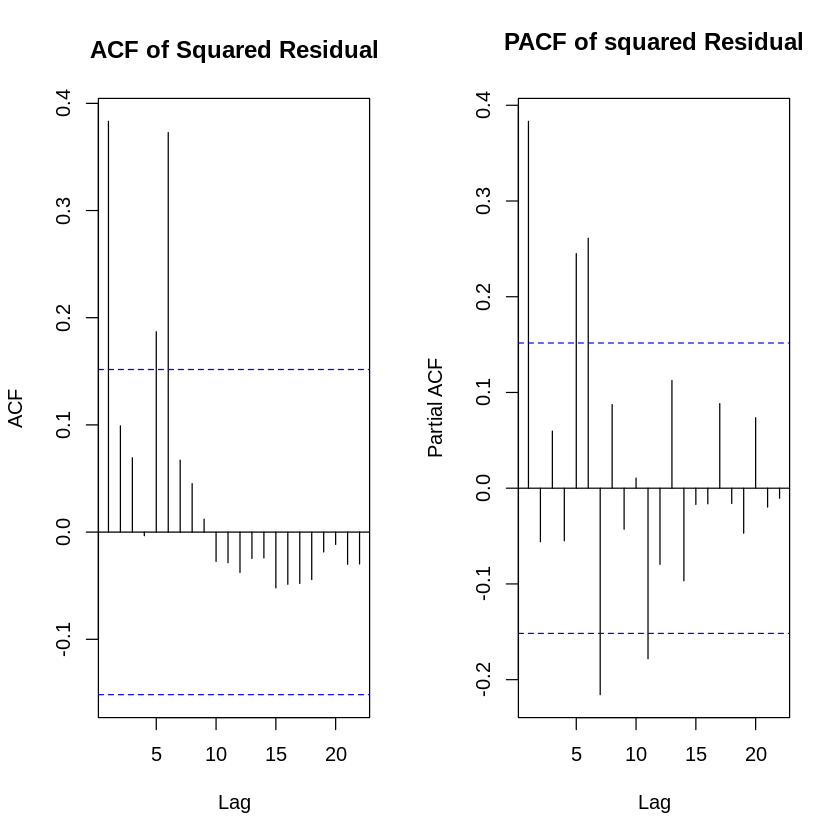

In [19]:
#plot acf dan pacf dari residual model arima(0,1,0)
par(mfrow=c(1,2))
acf(as.vector(square_resid1), main='ACF of Squared Residual')
pacf(as.vector(square_resid1), main= 'PACF of squared Residual')

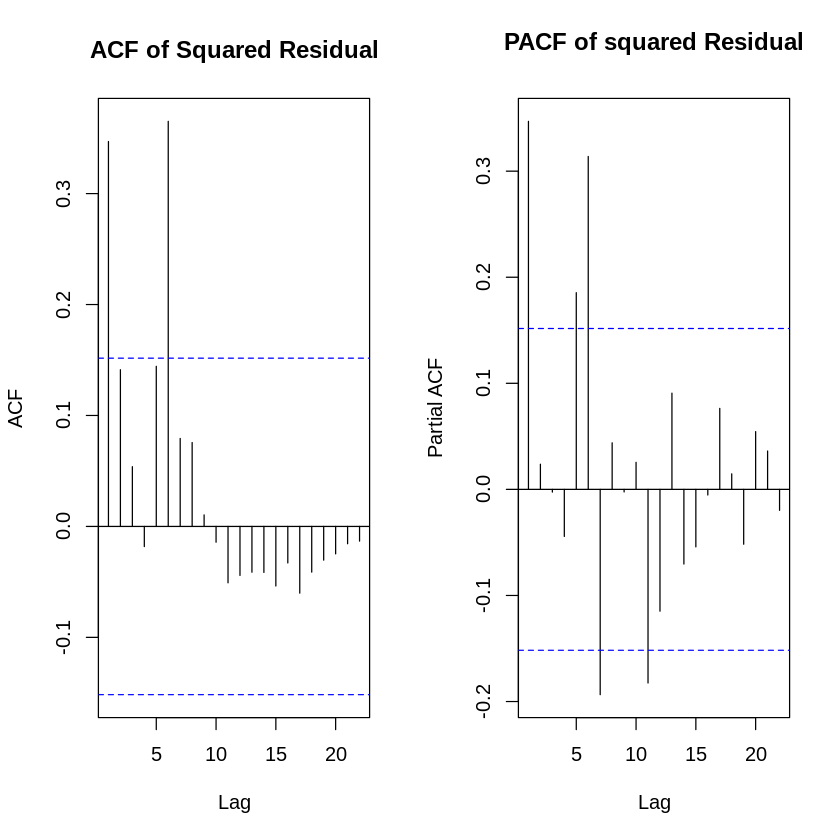

In [20]:
#plot acf dan pacf dari residual model arima(2,1,2)
par(mfrow=c(1,2))
acf(as.vector(square_resid2), main='ACF of Squared Residual')
pacf(as.vector(square_resid2), main= 'PACF of squared Residual')

####Specify ARCH Model with ARIMA(0,1,0) as mean model

In [21]:
#arch(1)
spec1_010 = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                  mean.model=list(armaOrder=c(0,0)),distribution.model="norm")
arch1_010.fit=ugarchfit(data=diff_indeks,spec=spec1_010)
arch1_010.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error  t value Pr(>|t|)
mu     4.3161e+01    13.94731   3.0946 0.001971
omega  2.5953e+04  4050.33485   6.4076 0.000000
alpha1 4.9354e-01     0.15933   3.0976 0.001951

Robust Standard Errors:
         Estimate  Std. Error  t value Pr(>|t|)
mu     4.3161e+01    13.18666   3.2731 0.001064
omega  2.5953e+04  5010.97706   5.1792 0.000000
alpha1 4.9354e-01     0.26254   1.8799 0.060128

LogLikelihood : -1113.203 

Information Criteria
------------------------------------
                   
Akaike       13.448
Bayes        13.504
Shibata      13.448
Hannan-Quinn 13.471

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
       

In [22]:
#arch(5)
spec5_010 = ugarchspec(variance.model=list(garchOrder=c(5,0)),
                   mean.model=list(armaOrder=c(0,0)),distribution.model="norm")
arch5_010.fit=ugarchfit(data=diff_indeks,spec=spec5_010)
arch5_010.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(5,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error  t value Pr(>|t|)
mu     3.6089e+01  1.1172e+01  3.23020 0.001237
omega  1.5997e+04  4.0529e+03  3.94711 0.000079
alpha1 5.3027e-01  2.6187e-01  2.02495 0.042872
alpha2 2.9123e-01  4.0765e-01  0.71440 0.474977
alpha3 0.0000e+00  1.0436e-01  0.00000 1.000000
alpha4 8.9645e-02  1.3568e-01  0.66073 0.508785
alpha5 8.7864e-02  5.9831e-02  1.46852 0.141963

Robust Standard Errors:
         Estimate  Std. Error  t value Pr(>|t|)
mu     3.6089e+01  1.5088e+01  2.39193  0.01676
omega  1.5997e+04  1.2971e+04  1.23326  0.21748
alpha1 5.3027e-01  3.7419e-01  1.41712  0.15645
alpha2 2.9123e-01  9.7662e-01  0.29820  0.76555
alpha3 0.0000e+00  3.1710e-01  0.00000  1.

In [23]:
#arch(6)
spec6_010 = ugarchspec(variance.model=list(garchOrder=c(6,0)),
                   mean.model=list(armaOrder=c(0,0)),distribution.model="norm")
arch6_010.fit=ugarchfit(data=diff_indeks,spec=spec6_010)
arch6_010.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(6,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error  t value Pr(>|t|)
mu     3.5725e+01  1.0258e+01  3.48264 0.000496
omega  1.5581e+04  2.7927e+03  5.57927 0.000000
alpha1 5.4052e-01  2.7575e-01  1.96018 0.049975
alpha2 2.7056e-01  4.5729e-01  0.59166 0.554075
alpha3 0.0000e+00  1.3029e-01  0.00000 1.000000
alpha4 9.9034e-02  1.3886e-01  0.71321 0.475718
alpha5 8.8878e-02  6.3887e-02  1.39118 0.164171
alpha6 0.0000e+00  9.6774e-02  0.00000 1.000000

Robust Standard Errors:
         Estimate  Std. Error  t value Pr(>|t|)
mu     3.5725e+01  1.8386e+01  1.94308 0.052006
omega  1.5581e+04  1.5001e+04  1.03866 0.298965
alpha1 5.4052e-01  3.9316e-01  1.37481 0.169190
alpha2 2.7056e-01  1.2368e+00  0.21877 0.8

####Specify ARCH Model with ARIMA(2,1,2) as mean model

In [24]:
#arch(1)
spec1_212 = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                   mean.model=list(armaOrder=c(2,2)),distribution.model="norm")
arch1_212.fit=ugarchfit(data=diff_indeks,spec=spec1_212)
arch1_212.fit

ERROR while rich displaying an object: Error in summary(fitA)$coef[2:4, 3:4]: subscript out of bounds

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.out

In [25]:
#arch(5)
spec5_212 = ugarchspec(variance.model=list(garchOrder=c(5,0)),
                   mean.model=list(armaOrder=c(2,2)),distribution.model="norm")
arch5_212.fit=ugarchfit(data=diff_indeks,spec=spec5_212)
arch5_212.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(5,0)
Mean Model	: ARFIMA(2,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error     t value Pr(>|t|)
mu      85.542281  4.7823e-02  1.7887e+03 0.000000
ar1     -0.052027  1.1900e-04 -4.3674e+02 0.000000
ar2      0.959695  8.4000e-04  1.1425e+03 0.000000
ma1     -0.037585  3.5000e-05 -1.0709e+03 0.000000
ma2     -1.076203  3.2000e-04 -3.3627e+03 0.000000
omega  164.439550  1.9847e+03  8.2854e-02 0.933968
alpha1   0.280747  6.5026e-02  4.3175e+00 0.000016
alpha2   0.247100  6.5325e-02  3.7826e+00 0.000155
alpha3   0.082520  5.0049e-02  1.6488e+00 0.099191
alpha4   0.193180  5.7899e-02  3.3365e+00 0.000848
alpha5   0.195452  3.8326e-02  5.0998e+00 0.000000

Robust Standard Errors:
         Estimate  Std. Error    t value Pr(>|t|)
mu  

In [26]:
#arch(6)
spec6_212 = ugarchspec(variance.model=list(garchOrder=c(6,0)),
                   mean.model=list(armaOrder=c(2,2)),distribution.model="norm")
arch6_212.fit=ugarchfit(data=diff_indeks,spec=spec6_212)
arch6_212.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(6,0)
Mean Model	: ARFIMA(2,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu     83.718125    0.101825  8.2218e+02 0.000000
ar1     0.049680    0.000691  7.1864e+01 0.000000
ar2     0.873718    0.001918  4.5560e+02 0.000000
ma1    -0.178358    0.000232 -7.6783e+02 0.000000
ma2    -0.915886    0.000637 -1.4388e+03 0.000000
omega   0.003423   38.469553  8.9000e-05 0.999929
alpha1  0.281821    0.071787  3.9258e+00 0.000086
alpha2  0.251847    0.082920  3.0372e+00 0.002388
alpha3  0.000000    0.053087  7.0000e-06 0.999994
alpha4  0.176301    0.058939  2.9912e+00 0.002778
alpha5  0.095582    0.056842  1.6815e+00 0.092658
alpha6  0.193449    0.082360  2.3488e+00 0.018833

Robust Standard Errors:
        Estimate

####Plot Conditional Variance ARCH(1) dengan ARIMA(0,1,0) sebagai Mean Model

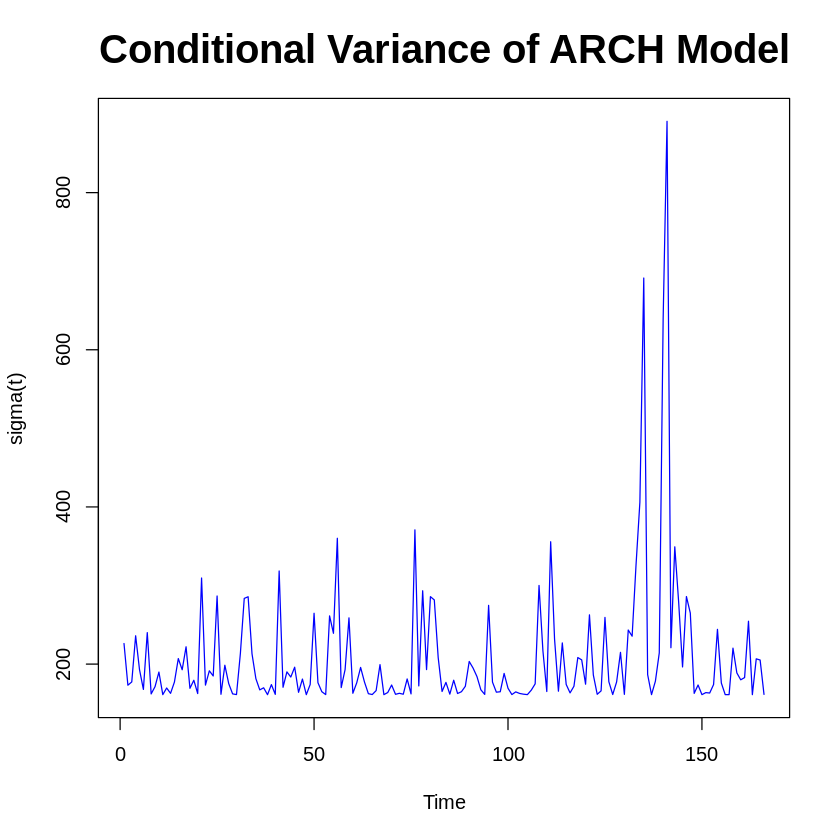

In [27]:
plot.ts(sigma(arch1_010.fit), ylab="sigma(t)", col="blue", main = "Conditional Variance of ARCH Model", cex.main=2)

####Plot Conditional Variance ARCH(1) dengan ARIMA(2,1,2) sebagai Mean Model

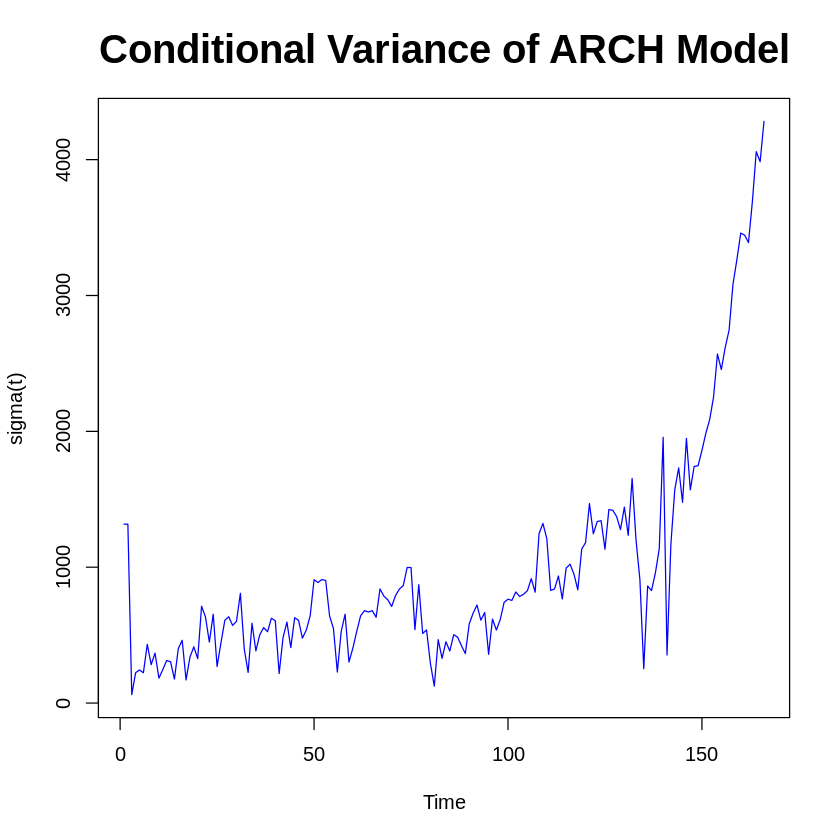

In [28]:
plot.ts(sigma(arch1_212.fit), ylab="sigma(t)", col="blue", main = "Conditional Variance of ARCH Model", cex.main=2)

### Forecasting

##### Prediction ARCH(1) dengan mean model ARIMA(0,1,0)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 5
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=167-01-01]:
    Series Sigma
T+1  43.16 166.7
T+2  43.16 199.1
T+3  43.16 213.4
T+4  43.16 220.1
T+5  43.16 223.3



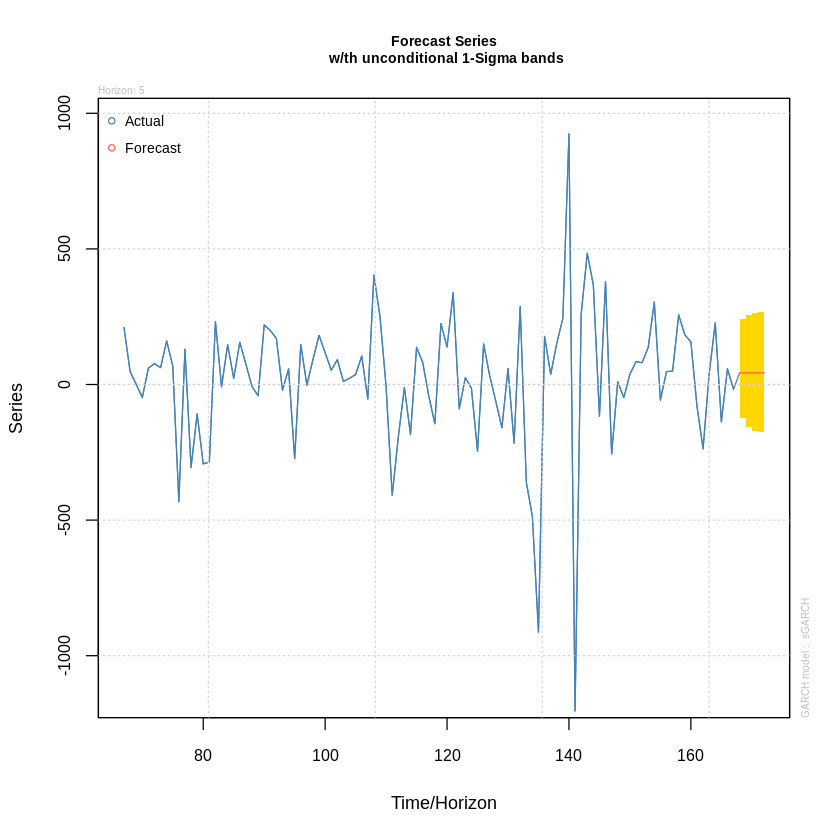

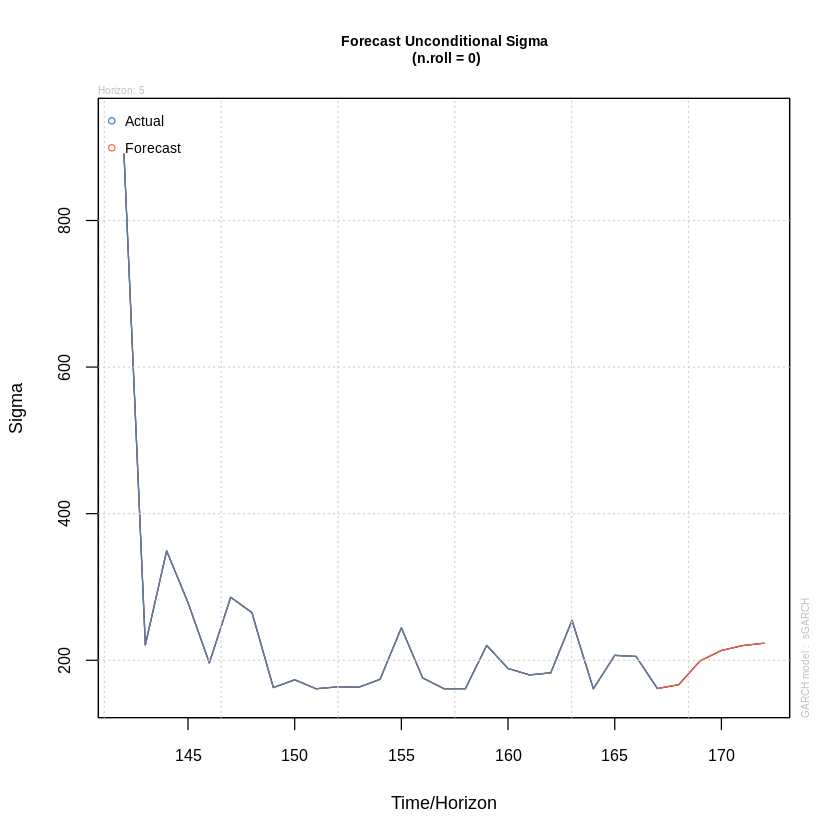

In [29]:
garchfit_forecast1= ugarchforecast(arch1_010.fit, n.ahead=5)
garchfit_forecast1
plot(garchfit_forecast1, which = 1)
plot(garchfit_forecast1, which = 3)

#### Prediction ARCH(1) dengan mean model ARIMA(2,1,2)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 5
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=167-01-01]:
     Series Sigma
T+1 -4635.9  4428
T+2 -2261.9  4426
T+3 -1154.6  4424
T+4  -552.9  4422
T+5  -246.2  4419



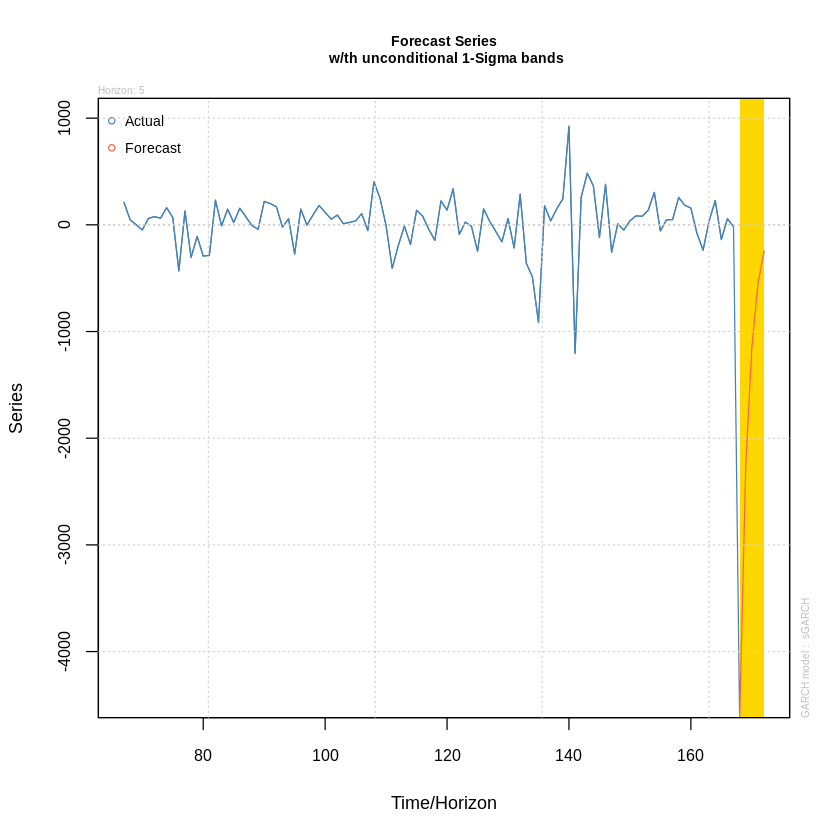

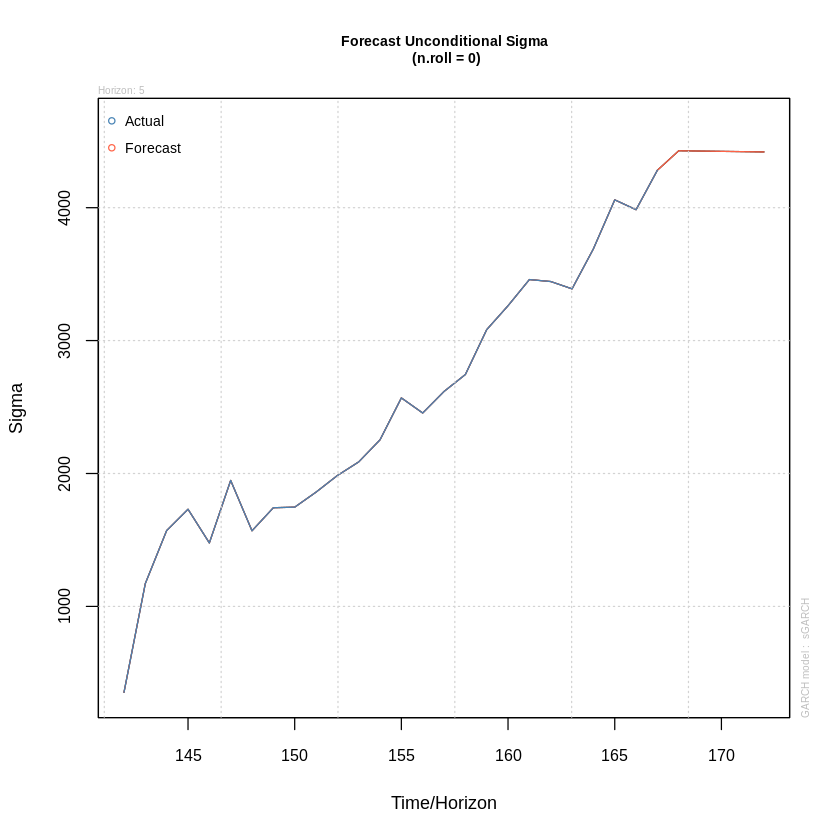

In [30]:
garchfit_forecast2= ugarchforecast(arch1_212.fit, n.ahead=5)
garchfit_forecast2
plot(garchfit_forecast2, which = 1)
plot(garchfit_forecast2, which = 3)